In [1]:
pip install Tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow  as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report


In [4]:
data=pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [7]:
x=data.drop('target',axis=1)
y=data.target


In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=35)

In [9]:
x_train.shape

(212, 13)

In [10]:
x_test.shape

(91, 13)

In [11]:
scale=StandardScaler()
x_train_scaled=scale.fit_transform(x_train)
x_test_scaled=scale.transform(x_test)

### adding layers

In [12]:
model=Sequential()
#input and first hidden layer
model.add(Dense(10,input_dim=13,activation='relu',kernel_initializer='uniform'))
# 10 implies number of nodes
#input_dim implies number of features/ x in data
# activation implies which activation function is using
#kernel_initializer implies weight initialization by default it is uniform


#second hidden layer
model.add(Dense(15,activation='relu',kernel_initializer='uniform'))

#third hidden layer
model.add(Dense(18,activation='relu',kernel_initializer='uniform'))

#forth hidden layer
# model.add(Dense(20,activation='relu',kernel_initializer='uniform'))

#fifth hidden layer
# model.add(Dense(25,activation='relu',kernel_initializer='uniform'))

#output layer
model.add(Dense(1,activation='sigmoid'))



C:\Users\ajwad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
#model.compile(loss='binary_crosentropy',optimizer='sgd',metrics=['accuracy'])
model.compile(loss='binary_crossentropy',optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 18)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            19 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 612 (2.39 KB)

 Trainable params: 612 (2.39 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
#training the model
training_history=model.fit(x_train_scaled,y_train,epochs=50,batch_size=10,
                           validation_data=(x_test_scaled,y_test))
training_history
#an epoch is a single iteration over the entire dataset during the training
#batch size is a number of training examples utilized in one  iteration to update

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5117 - loss: 0.6922 - val_accuracy: 0.5385 - val_loss: 0.6901
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5430 - loss: 0.6904 - val_accuracy: 0.5385 - val_loss: 0.6915
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5317 - loss: 0.6940 - val_accuracy: 0.5385 - val_loss: 0.6905
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5266 - loss: 0.6940 - val_accuracy: 0.5385 - val_loss: 0.6900
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5393 - loss: 0.6915 - val_accuracy: 0.5385 - val_loss: 0.6907
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5384 - loss: 0.6919 - val_accuracy: 0.5385 - val_loss: 0.6904
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5371 - loss: 0.6920 - val_accuracy: 0.5385 - val_loss: 0.6916
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5211 - loss: 0.6975 - val_accuracy: 0.5385 - val_loss:

In [15]:
hist=training_history.history
hist.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [16]:
hist['val_accuracy'][-1]


0.8131868243217468

Text(0, 0.5, 'loss')

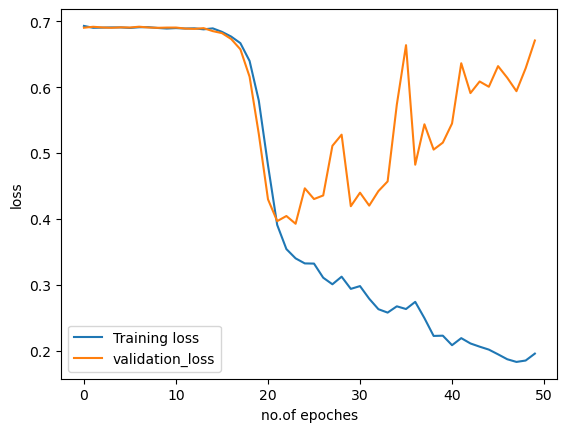

In [17]:
# hist['val_accuracy'][-1]
plt.plot(hist['loss'],label='Training loss')
plt.plot(hist['val_loss'],label='validation_loss')
plt.legend()
plt.xlabel('no.of epoches')
plt.ylabel('loss')

#### above graph we can understand that the training and accuracy are not the same beacuse we dont use hypertuning ie ton find the best parameters

In [18]:
y_pred=model.predict(x_test)
y_pred
#the values between 0 and 1 BCZ the activation function is sigmoid

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[1.26003647e-14],
       [7.10629443e-20],
       [2.98005573e-30],
       [8.46024478e-26],
       [2.00844333e-01],
       [1.90184873e-22],
       [1.00577366e-29],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [4.14890441e-37],
       [4.89328975e-36],
       [8.24035953e-21],
       [0.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [6.17881800e-34],
       [4.83052349e-23],
       [9.99999821e-01],
       [3.38689353e-16],
       [0.00000000e+00],
       [4.76718396e-31],
       [9.49364947e-20],
       [1.03412693e-31],
       [3.02443908e-07],
       [3.16928897e-15],
       [2.17701422e-30],
       [9.99997497e-01],
       [9.99999642e-01],
       [2.05539830e-09],
       [0.00000000e+00],
       [9.99999881e-01],
       [6.36856743e-17],
       [1.00000000e+00],
       [2.01954514e-32],
       [0.00000000e+00],
       [1.95162204e-27],


In [19]:
#next wwe want to convert the values in to 1 and 0
ypred_classes=(y_pred>0.5).astype('int32')
ypred_classes

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [20]:
int(model.predict(scale.transform([[37,1,2,130,250,0,1,187,0,3.5,0,0,2]]))>.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


C:\Users\ajwad\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ajwad\AppData\Local\Temp\ipykernel_12304\3092166658.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(model.predict(scale.transform([[37,1,2,130,250,0,1,187,0,3.5,0,0,2]]))>.5)


1

In [21]:
print(classification_report(y_test,ypred_classes))

              precision    recall  f1-score   support

           0       0.54      0.98      0.69        42
           1       0.93      0.29      0.44        49

    accuracy                           0.60        91
   macro avg       0.74      0.63      0.57        91
weighted avg       0.75      0.60      0.56        91



In [22]:
confusion_matrix(y_test,ypred_classes)


array([[41,  1],
       [35, 14]], dtype=int64)

### health care data set (stroke)


In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [63]:
data=pd.read_csv("healthcare-dataset-stroke-data (1).csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [64]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [65]:
data.bmi.unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

In [66]:
mean=data.bmi.mean()
mean

28.893236911794666

In [67]:
data.bmi=data.bmi.fillna(mean)
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [68]:
data=data.drop('id',axis=1)

In [69]:
le=LabelEncoder()


In [70]:
data.gender=le.fit_transform(data.gender)
data.ever_married=le.fit_transform(data.ever_married)
data.work_type=le.fit_transform(data.work_type)
data.Residence_type=le.fit_transform(data.Residence_type)
data.smoking_status=le.fit_transform(data.smoking_status)

In [71]:
x=data.drop('stroke',axis=1)
y=data.stroke


In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y ,test_size=0.25,random_state=35)


In [80]:
x_train.shape

(3832, 10)

In [81]:
x_test.shape

(1278, 10)

In [82]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

In [83]:
model=Sequential()

model.add(Dense(10,input_dim=10,activation='relu',kernel_initializer='uniform'))
model.add(Dense(15,activation='relu',kernel_initializer='uniform'))
model.add(Dense(18,activation='relu',kernel_initializer='uniform'))
model.add(Dense(1,activation='sigmoid'))

C:\Users\ajwad\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [84]:
model.compile(loss='binary_crossentropy',optimizer=SGD(learning_rate=0.1),metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 18)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            19 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 582 (2.27 KB)

 Trainable params: 582 (2.27 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
training_history1=model.fit(x_train_scaled,y_train,epochs=50,batch_size=10,validation_data=(x_test_scaled,y_test))
training_history1

Epoch 1/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9474 - loss: 0.2507 - val_accuracy: 0.9554 - val_loss: 0.1863
Epoch 2/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.9517 - loss: 0.1952 - val_accuracy: 0.9554 - val_loss: 0.1821
Epoch 3/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - accuracy: 0.9555 - loss: 0.1815 - val_accuracy: 0.9554 - val_loss: 0.1805
Epoch 4/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.9466 - loss: 0.2011 - val_accuracy: 0.9554 - val_loss: 0.1583
Epoch 5/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.9525 - loss: 0.1602 - val_accuracy: 0.9554 - val_loss: 0.1527
Epoch 6/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.9443 - loss: 0.1748 - val_accuracy: 0.9554 - val_loss: 0.1481
Epoch 7/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.9441 - loss: 0.1732 - val_accuracy: 0.9554 - val_loss: 0.1492
Epoch 8/50
384/384 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.9462 - loss: 0.1712 - va

In [86]:
hist=training_history1.history
hist.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [87]:
hist['val_accuracy'][-1]

0.9553990364074707

Text(0, 0.5, 'loss')

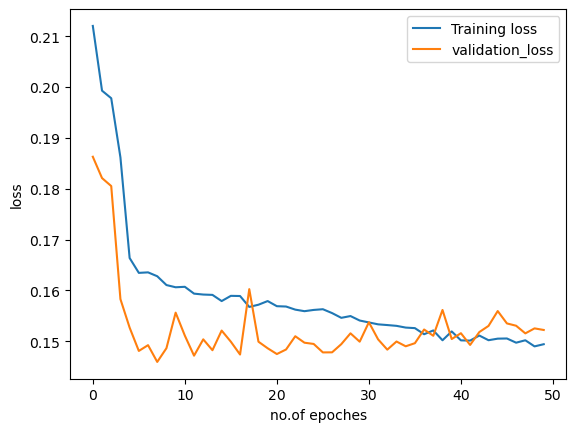

In [88]:
plt.plot(hist['loss'],label='Training loss')
plt.plot(hist['val_loss'],label='validation_loss')
plt.legend()
plt.xlabel('no.of epoches')
plt.ylabel('loss')

In [89]:
y_pred1=model.predict(x_test)
y_pred1

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[5.9863811e-13],
       [2.8615913e-01],
       [2.8615913e-01],
       ...,
       [2.6999179e-01],
       [2.8622648e-01],
       [2.8615913e-01]], dtype=float32)

In [90]:
ypred_classes=(y_pred1>0.5).astype('int32')
ypred_classes

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [94]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [96]:
int(model.predict(scaler.transform([[1,67.0,0,1,1,2,1,228.69,36.600000,1]]))>.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


C:\Users\ajwad\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ajwad\AppData\Local\Temp\ipykernel_12304\1817357389.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(model.predict(scaler.transform([[1,67.0,0,1,1,2,1,228.69,36.600000,1]]))>.5)


0

In [98]:
print(classification_report(y_test,ypred_classes))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1221
           1       0.00      0.00      0.00        57

    accuracy                           0.96      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.96      0.93      1278



C:\Users\ajwad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajwad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ajwad\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [99]:
cm=confusion_matrix(y_test,ypred_classes)
cm

array([[1221,    0],
       [  57,    0]], dtype=int64)